# Bike Sharing Assignment

    Problem Statement
    A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


    A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


    In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


    They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands
    Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [86]:
# importing usefull libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error


In [87]:
# Used the plotly plots ,because it gives more interactive insights about the plot
import datetime
import plotly.offline as pyo
import plotly.graph_objs as go
%matplotlib inline
import plotly.io as pio
pio.renderers.default='notebook'

## Analysing Dataset

In [88]:
# loading the data set
bike = pd.read_csv('day.csv')
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [89]:
# checking the datatypes null values and number of instances of each features
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [90]:
# describing the mathematical terms 
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

checking for the columns values counts

In [91]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [92]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [93]:
bike.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

# Data Preparation:

in the data dictionary file we have all details of feature columns so I will follow the data dictionary , data types and let's prepare them.

In [94]:
# loading and checking the meta data provided to us , so that I can check and work according to this
f = open('MetaData.txt')
yourList = f.readlines()
yourList

['=========================================\n',
 'Dataset characteristics\n',
 '=========================================\t\n',
 'day.csv have the following fields:\n',
 '\t\n',
 '\t- instant: record index\n',
 '\t- dteday : date\n',
 '\t- season : season (1:spring, 2:summer, 3:fall, 4:winter)\n',
 '\t- yr : year (0: 2018, 1:2019)\n',
 '\t- mnth : month ( 1 to 12)\n',
 '\t- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)\n',
 '\t- weekday : day of the week\n',
 '\t- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.\n',
 '\t+ weathersit : \n',
 '\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n',
 '\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n',
 '\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n',
 '\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\n',
 '\t- temp : temperature in Celsius\n',
 '\t- atemp: feeling

## Feature engineering
Creating categorical features from numerical columns as described in the data dictionary

In [95]:
# we can create dayofweek from date column
bike.dteday = pd.to_datetime(bike.dteday)
bike['dayofweek'] = bike['dteday'].dt.weekday_name


In [96]:
# mapping the columns Season and weather to categorical columns by help of the data Dictionary
bike["season"] = bike.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
bike["weathersit"] = bike.weathersit.map({1: "Clear",2 : " Mist" ,3 : "Light Snow",4 :"Heavy Rain" })
bike.head()

instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2018-01-01  Spring   0     1        0        6           0   
1        2 2018-02-01  Spring   0     1        0        0           0   
2        3 2018-03-01  Spring   0     1        0        1           1   
3        4 2018-04-01  Spring   0     1        0        2           1   
4        5 2018-05-01  Spring   0     1        0        3           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt dayofweek  
0   985    Monday  
1   801  Thursday  
2  1349  Thursday  
3  1562    Sunday  
4  1600   Tuesday

### Encoding used 
    1: " Clear + Few clouds + Partly cloudy + Partly cloudy" == Clear
    2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist " == Mist
    3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" == Light Snow
    4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " == Heavy Rain

In [97]:
# lets check value count for month column
bike.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [98]:
bike["mnth"] = bike.mnth.map({1: "Jan", 2 : "Feb", 3 : "Mar", 4 :"Apr" ,5: "May", 6 : "Jun", 7 : "Jul", 8 :"Aug" , 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 :"Dec" })



In [99]:
#dropping unncessary columns
bike  = bike.drop(["dteday"],axis=1)


# Data Visualization

Text(0.5, 0.98, 'Recorded Bike Rental Counts')

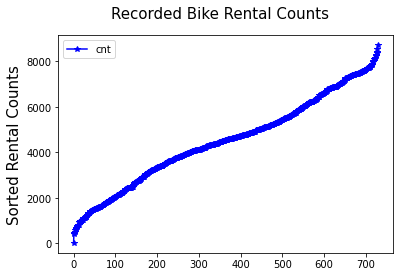

In [100]:
# Number Summary of the Bike Rental Count 'cnt' Feature
fig, ax = plt.subplots(1)
ax.plot(sorted(bike['cnt']), color = 'blue', marker = '*', label='cnt')
ax.legend(loc= 'upper left')
ax.set_ylabel('Sorted Rental Counts', fontsize = 15)
fig.suptitle('Recorded Bike Rental Counts', fontsize = 15)

In [101]:
# scatter plot b/w "temp and rental count"
fig = px.scatter(bike ,x='temp', y='cnt' , title="temperature V/S rental Count")
fig.show()

In [102]:
# scatter plot b/w "feels like temp and rental count"
fig = px.scatter(bike ,x='atemp', y='cnt' , title="feels like temp V/S rental count")
fig.show()

In [103]:
# scatter plot b/w "Humidity V/S rental count"
fig = px.scatter(bike ,x='hum', y='cnt' , title="Humidity V/S rental count")
fig.show()

Rental count is high when the humidity is in between 40 to 80

In [104]:
# scatter plot b/w "WindSpeed V/S rental count"
fig = px.scatter(bike ,x='windspeed', y='cnt' , title="Windspeed V/S rental count")
fig.show()

Rental count is high when the windspeed is in between 7 to 17

### Plot for categorical features , Season and weathersit

## season vs count

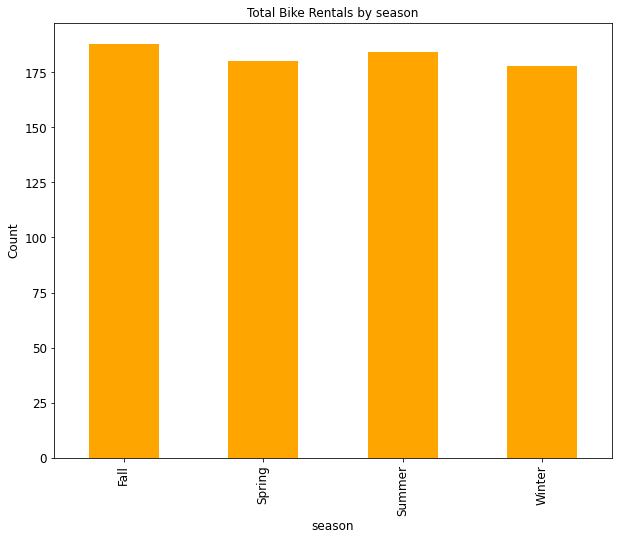

In [105]:
ax = bike[['season','cnt']].groupby(['season']).count().plot(kind='bar', figsize=(10, 8),
                                       legend = False, title ="Total Bike Rentals by season", 
                                       color='orange', fontsize=12)
ax.set_xlabel("season", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()


## weather vs count

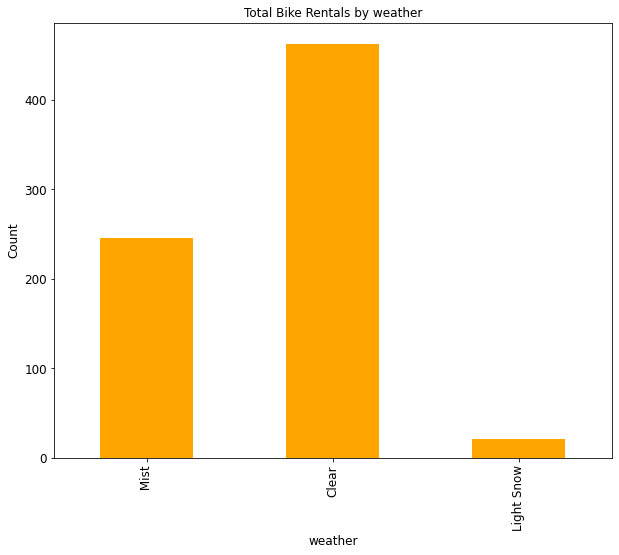

In [106]:
ax = bike[['weathersit','cnt']].groupby(['weathersit']).count().plot(kind='bar', figsize=(10, 8),
                                       legend = False, title ="Total Bike Rentals by weather", 
                                       color='orange', fontsize=12)
ax.set_xlabel("weather", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

rental count is very high when the weather is clear i.e "Clear + Few clouds + Partly cloudy + Partly cloudy" and less in Mist and very few in case of Light snow.

which is self explanatory

## weekday vs count

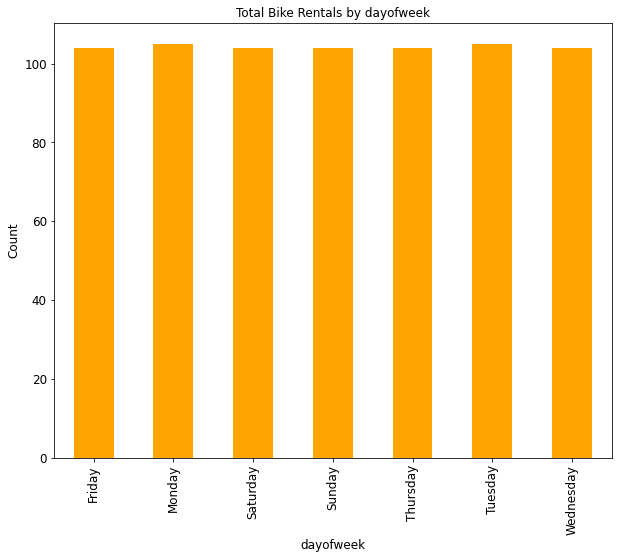

In [107]:
ax = bike[['dayofweek','cnt']].groupby(['dayofweek']).count().plot(kind='bar', figsize=(10, 8),
                                       legend = False, title ="Total Bike Rentals by dayofweek", 
                                       color='orange', fontsize=12)
ax.set_xlabel("dayofweek", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

rental count is almost same through out the dayofweek

In [108]:
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']


In [109]:
# convert dtype of categorical variables
bike[cat_vars] = bike[cat_vars].astype('category')

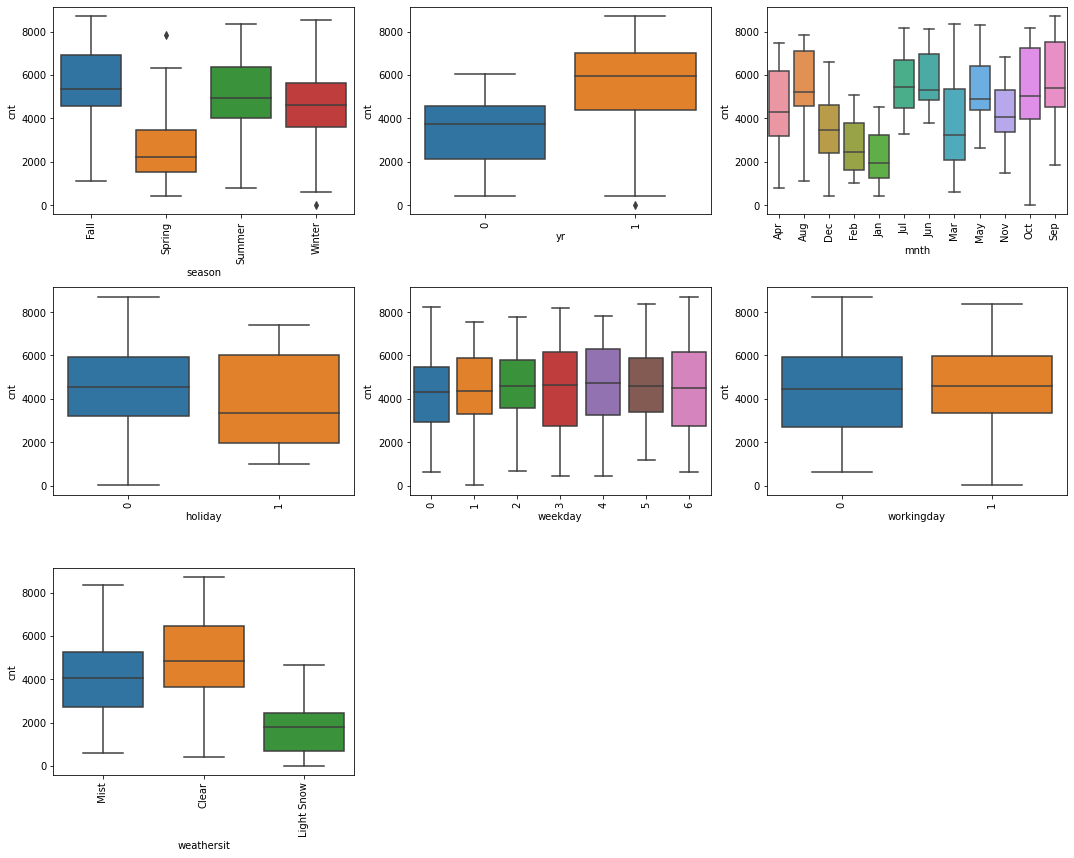

In [110]:
# Box plot for categorical variables
col = 3
row = len(cat_vars)//col+1

plt.figure(figsize=(15,12))
for i in list(enumerate(cat_vars)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bike)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

#### Observations
	1. The demand of bike is less in the month of spring when compared with   other seasons
	2. The demand bike increased in the year 2019 when compared with year 2018.
	3. Month Sep has the highest demand and Jan has lowest demand .Months Jan, Feb ,Nov and Dec have lower rental demands than the other months.
	4. Bike demand is less in holidays in comparison to not being holiday
	5. The demand of bike is almost similar throughout the weekdays.
	6. The bike demand is high when weather is clear and Few clouds however demand is less in case of Light snow and light rainfall. 

## Correlation Analysis

    One common way to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","casual","registered","hum","windspeed"].


<AxesSubplot:>

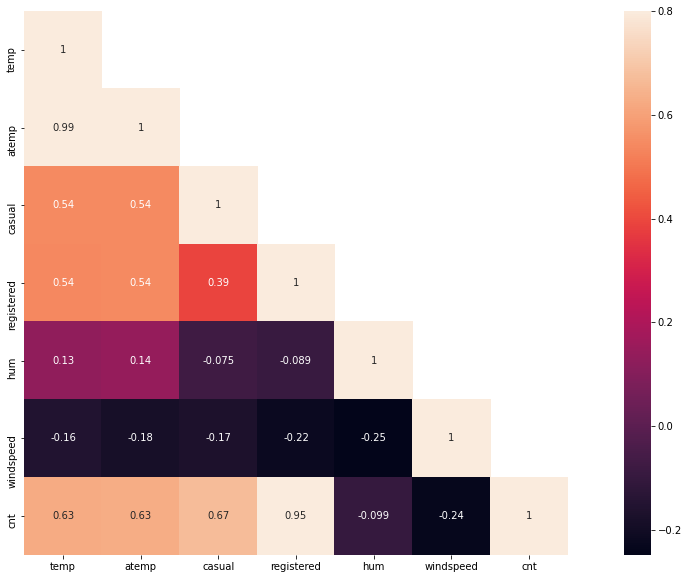

In [111]:
corrMatt = bike[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)


In [112]:
# heatmap for all numerical columns

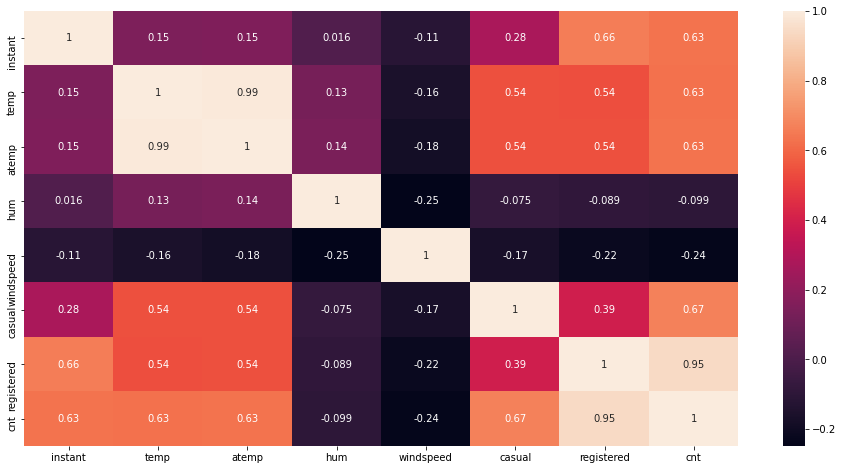

In [113]:
plt.figure(figsize=(16,8))
sns.heatmap(bike.corr(), annot=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecation

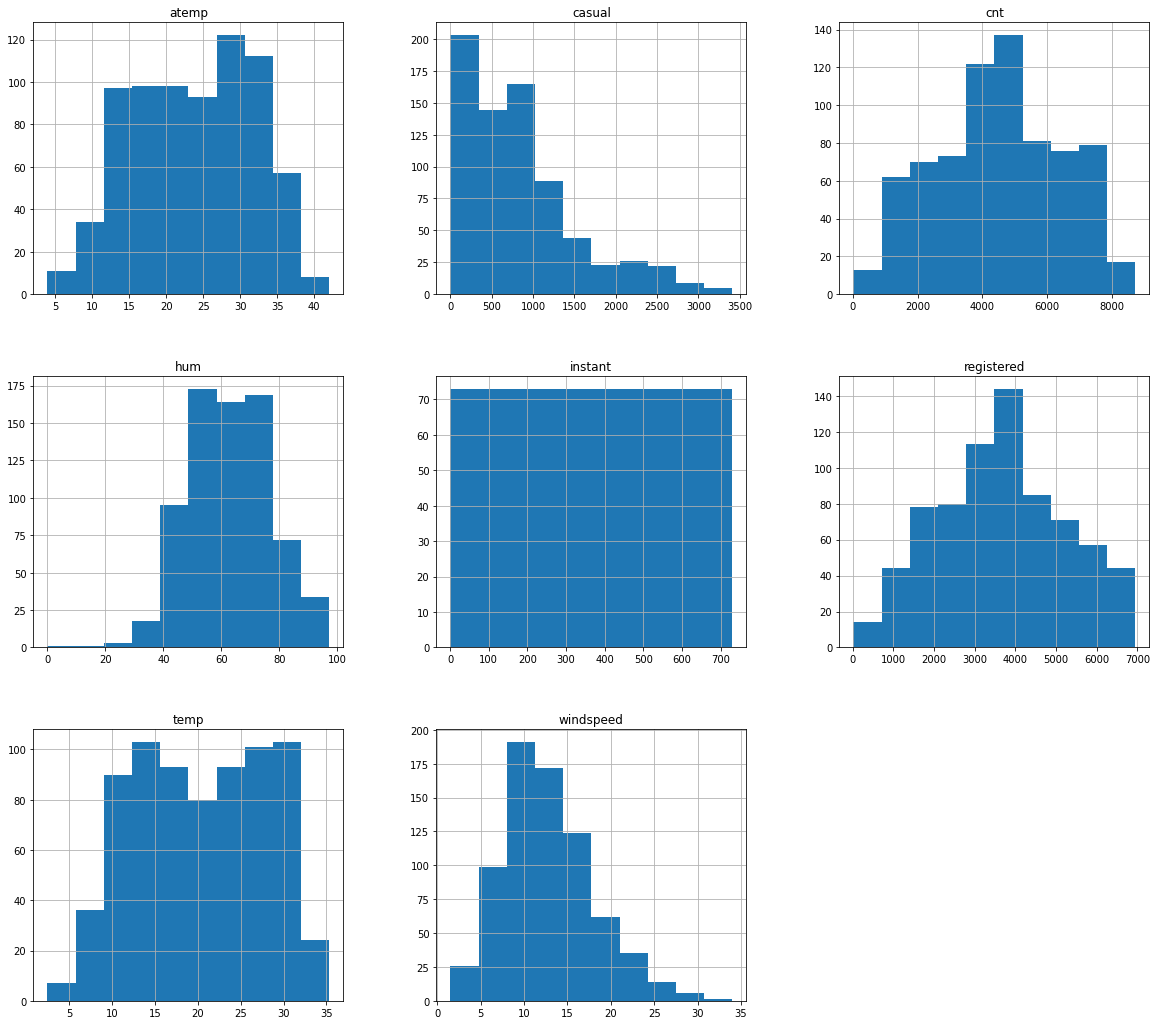

In [114]:
bike.hist(figsize = (20,18))
plt.show()

<Figure size 1440x1296 with 0 Axes>

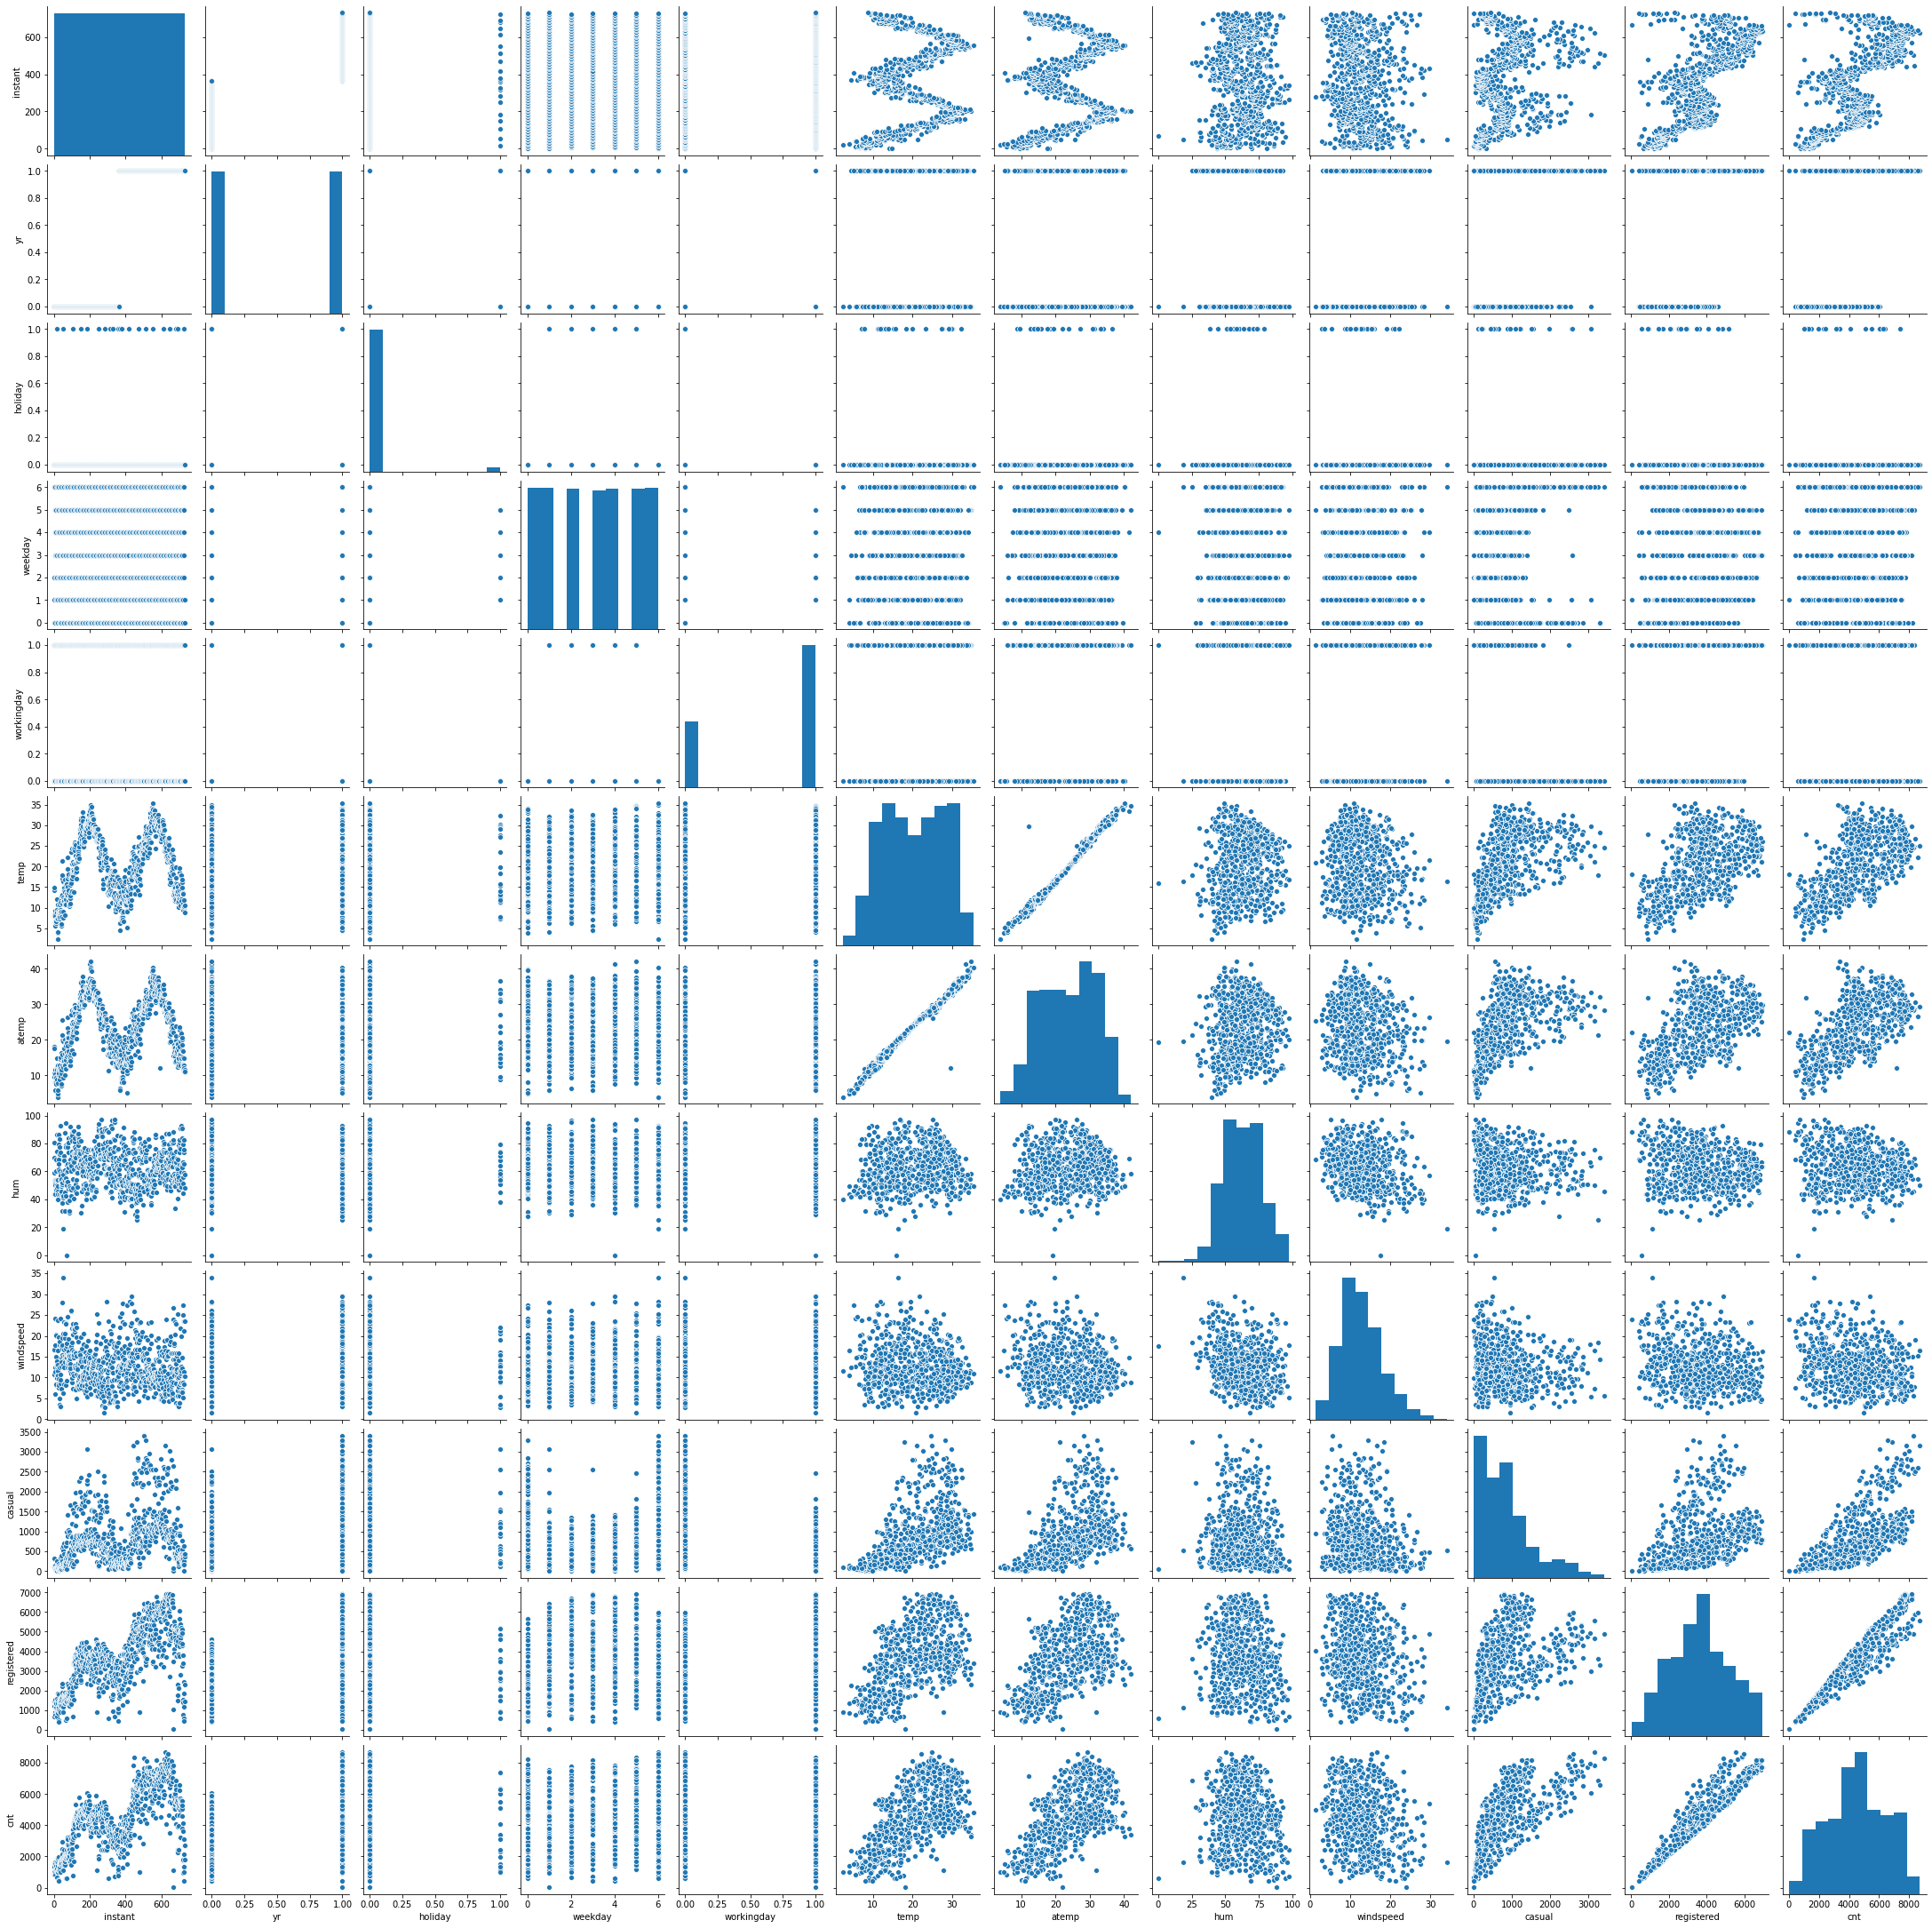

In [115]:
plt.figure(figsize=(20,18))
sns.pairplot(bike)
plt.show()

## Outlier Analysis
For this we can use the box plot method

In [116]:
# box plot between season and rental count
fig = px.box(bike ,y='cnt', x='season',title="box plot between season and rental count")
fig.show()


In [117]:
# box plot between weather and rental count
fig = px.box(bike ,y='weathersit', x='season',title="box plot between weather and rental count")
fig.show()

In [118]:
# box plot between workingday and rental count
fig = px.box(bike ,y='cnt', x='workingday',title="box plot between workingday and rental count")
fig.show()


In [119]:
# box plot between datofweek and rental count
fig = px.box(bike ,y='cnt', x='dayofweek',title="box plot between dayofweek and rental count")
fig.show()

In [120]:
# box plot between month and rental count
fig = px.box(bike ,y='cnt', x='mnth',title="box plot between month and rental count")
fig.show()

### From the above boxplot analysis we can say that there are negligible outliers present in the dataset so we donot need to do any outliers handling.

# Now for model building we need to prepare the dataset 

### convert the categorical columns to numerical columns 

In [121]:
bike_num = bike.copy()

In [122]:
bike_num.head()

instant  season yr mnth holiday weekday workingday weathersit       temp  \
0        1  Spring  0  Jan       0       6          0       Mist  14.110847   
1        2  Spring  0  Jan       0       0          0       Mist  14.902598   
2        3  Spring  0  Jan       0       1          1      Clear   8.050924   
3        4  Spring  0  Jan       0       2          1      Clear   8.200000   
4        5  Spring  0  Jan       0       3          1      Clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt dayofweek  
0  18.18125  80.5833  10.749882     331         654   985    Monday  
1  17.68695  69.6087  16.652113     131         670   801  Thursday  
2   9.47025  43.7273  16.636703     120        1229  1349  Thursday  
3  10.60610  59.0435  10.739832     108        1454  1562    Sunday  
4  11.46350  43.6957  12.522300      82        1518  1600   Tuesday

In [123]:
# get dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(bike_num[['season','dayofweek','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
bike_num = pd.concat([bike_num,dummy_vars], axis = 1)

# drop season column
bike_num.drop(['season','dayofweek','mnth','weathersit'], axis=1, inplace=True)



In [124]:
bike_num.shape

(730, 34)

In [125]:
bike_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
instant                  730 non-null int64
yr                       730 non-null category
holiday                  730 non-null category
weekday                  730 non-null category
workingday               730 non-null category
temp                     730 non-null float64
atemp                    730 non-null float64
hum                      730 non-null float64
windspeed                730 non-null float64
casual                   730 non-null int64
registered               730 non-null int64
cnt                      730 non-null int64
season_Spring            730 non-null uint8
season_Summer            730 non-null uint8
season_Winter            730 non-null uint8
dayofweek_Monday         730 non-null uint8
dayofweek_Saturday       730 non-null uint8
dayofweek_Sunday         730 non-null uint8
dayofweek_Thursday       730 non-null uint8
dayofweek_Tuesday        730 non-null u

In [126]:
# Convert categorical columns to numeric 
bike_num[['yr','holiday','workingday']]= bike_num[['yr','holiday','workingday']].astype('uint8')
bike_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
instant                  730 non-null int64
yr                       730 non-null uint8
holiday                  730 non-null uint8
weekday                  730 non-null category
workingday               730 non-null uint8
temp                     730 non-null float64
atemp                    730 non-null float64
hum                      730 non-null float64
windspeed                730 non-null float64
casual                   730 non-null int64
registered               730 non-null int64
cnt                      730 non-null int64
season_Spring            730 non-null uint8
season_Summer            730 non-null uint8
season_Winter            730 non-null uint8
dayofweek_Monday         730 non-null uint8
dayofweek_Saturday       730 non-null uint8
dayofweek_Sunday         730 non-null uint8
dayofweek_Thursday       730 non-null uint8
dayofweek_Tuesday        730 non-null uint8
dayo

In [127]:
bike_num.head()

instant  yr  holiday weekday  workingday       temp     atemp      hum  \
0        1   0        0       6           0  14.110847  18.18125  80.5833   
1        2   0        0       0           0  14.902598  17.68695  69.6087   
2        3   0        0       1           1   8.050924   9.47025  43.7273   
3        4   0        0       2           1   8.200000  10.60610  59.0435   
4        5   0        0       3           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  \
0  10.749882     331  ...         1         0         0         0         0   
1  16.652113     131  ...         1         0         0         0         0   
2  16.636703     120  ...         1         0         0         0         0   
3  10.739832     108  ...         1         0         0         0         0   
4  12.522300      82  ...         1         0         0         0         0   

   mnth_Nov  mnth_Oct  mnth_Sep  weathersit_Clear  weathersit_Light Snow  
0         0         0         0                 0                      0  
1         0         0         0                 0                      0  
2         0         0         0                 1                      0  
3         0         0         0                 1                      0  
4         0         0         0                 1                      0  

[5 rows x 34 columns]

In [128]:
# not usefull columns can be dropped
bike_num = bike_num.drop(['weekday','instant','casual','registered'], 1)

casual and registered columns can be directly evaluated from cnt which is target feature , so if cannot drop them then ,there may the problem of *target leakage*

In [129]:
bike_num.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_Spring  season_Summer  ...  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  \
0              1              0  ...         1         0         0         0   
1              1              0  ...         1         0         0         0   
2              1              0  ...         1         0         0         0   
3              1              0  ...         1         0         0         0   
4              1              0  ...         1         0         0         0   

   mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  weathersit_Clear  \
0         0         0         0         0                 0   
1         0         0         0         0                 0   
2         0         0         0         0                 1   
3         0         0         0         0                 1   
4         0         0         0         0                 1   

   weathersit_Light Snow  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  

[5 rows x 30 columns]

In [130]:
bike_num.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

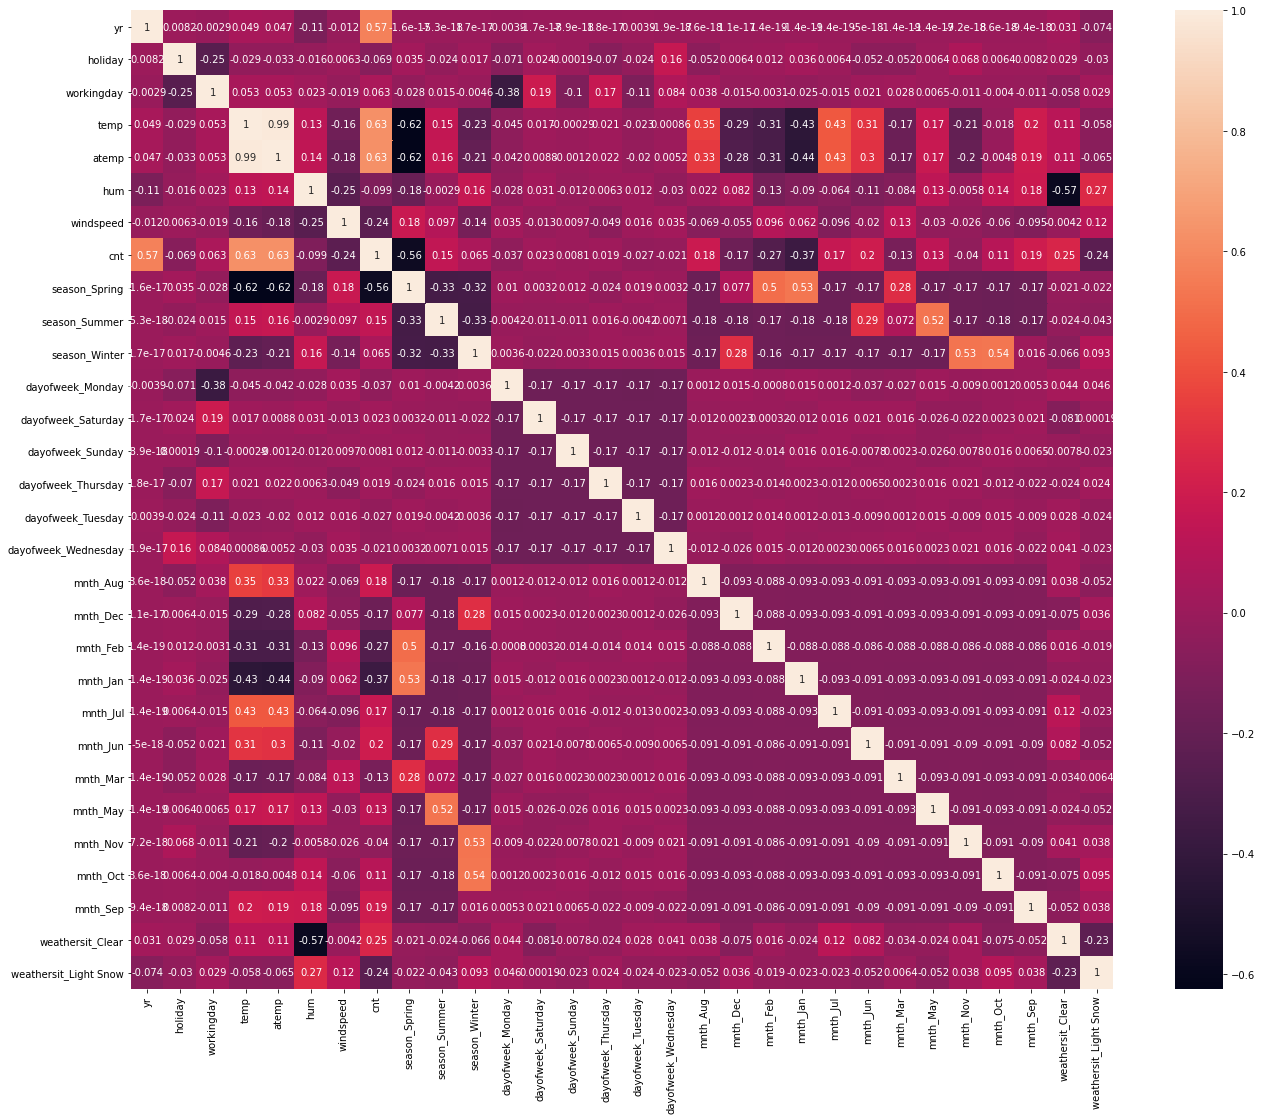

In [131]:
plt.figure(figsize=(22,18))
corr = bike_num.corr()
sns.heatmap(corr, annot=True)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.show()

## Splitting the Data into Training and Testing Sets


In [132]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
# Split train test dataset
df_train, df_test = train_test_split(bike_num, train_size = 0.7, random_state = 10 )
print(df_train.shape)
print(df_test.shape)


(510, 30)
(220, 30)


## Rescaling the Features
We will use MinMax scaling.

During EDA we could observe that there is different range of data in the data set. So it becomes important to scale the data.
Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset.

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [134]:
# Scaling of train set
# instantiate an object
scaler = MinMaxScaler()
num_vars = ['temp', 'hum','windspeed','cnt','atemp']
# fit and transform on training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

/Users/chiranjeev/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



yr  holiday  workingday      temp     atemp       hum  windspeed  \
72    0        0           1  0.298094  0.311594  0.393891   0.236118   
510   1        0           0  0.778657  0.731886  0.694105   0.364071   
700   1        0           0  0.327249  0.348399  0.809877   0.210252   
264   0        0           1  0.694699  0.613206  0.910249   0.217975   
577   1        0           1  0.811368  0.765180  0.624004   0.244886   

          cnt  season_Spring  season_Summer  ...  mnth_Jan  mnth_Jul  \
72   0.194978              1              0  ...         0         0   
510  0.737052              0              1  ...         0         0   
700  0.509236              0              0  ...         0         0   
264  0.526862              0              0  ...         0         0   
577  0.863093              0              0  ...         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
72          0         1         0         0         0         0   
510         0         0         1         0         0         0   
700         0         0         0         0         0         0   
264         0         0         0         0         0         1   
577         0         0         0         0         0         0   

     weathersit_Clear  weathersit_Light Snow  
72                  1                      0  
510                 1                      0  
700                 0                      0  
264                 0                      0  
577                 1                      0  

[5 rows x 30 columns]

In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 72 to 265
Data columns (total 30 columns):
yr                       510 non-null uint8
holiday                  510 non-null uint8
workingday               510 non-null uint8
temp                     510 non-null float64
atemp                    510 non-null float64
hum                      510 non-null float64
windspeed                510 non-null float64
cnt                      510 non-null float64
season_Spring            510 non-null uint8
season_Summer            510 non-null uint8
season_Winter            510 non-null uint8
dayofweek_Monday         510 non-null uint8
dayofweek_Saturday       510 non-null uint8
dayofweek_Sunday         510 non-null uint8
dayofweek_Thursday       510 non-null uint8
dayofweek_Tuesday        510 non-null uint8
dayofweek_Wednesday      510 non-null uint8
mnth_Aug                 510 non-null uint8
mnth_Dec                 510 non-null uint8
mnth_Feb                 510 non-null uint8
mnth

In [136]:
# transform test dataset 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


/Users/chiranjeev/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



yr  holiday  workingday      temp     atemp       hum  windspeed  \
566   1        0           0  0.652175  0.606373  0.863516   0.393568   
374   1        0           1  0.276477  0.293773  0.584521   0.340487   
181   0        0           1  0.817910  0.744691  0.265533   0.165370   
529   1        0           1  0.720868  0.707113  0.486457   0.476922   
233   0        0           1  0.777567  0.725877  0.359532   0.524373   

          cnt  season_Spring  season_Summer  ...  mnth_Jan  mnth_Jul  \
566  0.486297              0              0  ...         0         1   
374  0.382349              1              0  ...         1         0   
181  0.595316              0              0  ...         0         1   
529  0.836895              0              1  ...         0         0   
233  0.522395              0              0  ...         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
566         0         0         0         0         0         0   
374         0         0         0         0         0         0   
181         0         0         0         0         0         0   
529         1         0         0         0         0         0   
233         0         0         0         0         0         0   

     weathersit_Clear  weathersit_Light Snow  
566                 0                      1  
374                 1                      0  
181                 1                      0  
529                 1                      0  
233                 1                      0  

[5 rows x 30 columns]

In [137]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
72    0        0           1  0.298094  0.311594  0.393891   0.236118   
510   1        0           0  0.778657  0.731886  0.694105   0.364071   
700   1        0           0  0.327249  0.348399  0.809877   0.210252   
264   0        0           1  0.694699  0.613206  0.910249   0.217975   
577   1        0           1  0.811368  0.765180  0.624004   0.244886   

     season_Spring  season_Summer  season_Winter  ...  mnth_Jan  mnth_Jul  \
72               1              0              0  ...         0         0   
510              0              1              0  ...         0         0   
700              0              0              1  ...         0         0   
264              0              0              0  ...         0         0   
577              0              0              0  ...         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
72          0         1         0         0         0         0   
510         0         0         1         0         0         0   
700         0         0         0         0         0         0   
264         0         0         0         0         0         1   
577         0         0         0         0         0         0   

     weathersit_Clear  weathersit_Light Snow  
72                  1                      0  
510                 1                      0  
700                 0                      0  
264                 0                      0  
577                 1                      0  

[5 rows x 29 columns]

In [138]:
# Creating X and y data dataframe for test set
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
566   1        0           0  0.652175  0.606373  0.863516   0.393568   
374   1        0           1  0.276477  0.293773  0.584521   0.340487   
181   0        0           1  0.817910  0.744691  0.265533   0.165370   
529   1        0           1  0.720868  0.707113  0.486457   0.476922   
233   0        0           1  0.777567  0.725877  0.359532   0.524373   

     season_Spring  season_Summer  season_Winter  ...  mnth_Jan  mnth_Jul  \
566              0              0              0  ...         0         1   
374              1              0              0  ...         1         0   
181              0              0              0  ...         0         1   
529              0              1              0  ...         0         0   
233              0              0              0  ...         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
566         0         0         0         0         0         0   
374         0         0         0         0         0         0   
181         0         0         0         0         0         0   
529         1         0         0         0         0         0   
233         0         0         0         0         0         0   

     weathersit_Clear  weathersit_Light Snow  
566                 0                      1  
374                 1                      0  
181                 1                      0  
529                 1                      0  
233                 1                      0  

[5 rows x 29 columns]

In [139]:
# Checking variables for for X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday',
       'dayofweek_Tuesday', 'dayofweek_Wednesday', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weathersit_Clear',
       'weathersit_Light Snow'],
      dtype='object')

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)
### RFE
Recursive feature elimination

In [140]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [141]:
# Running RFE to select 15 number of varibles
# Create object
lm = LinearRegression()
# fit model
lm.fit(X_train, y_train)
# run RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [142]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('dayofweek_Monday', False, 15),
 ('dayofweek_Saturday', False, 3),
 ('dayofweek_Sunday', False, 12),
 ('dayofweek_Thursday', False, 14),
 ('dayofweek_Tuesday', False, 9),
 ('dayofweek_Wednesday', False, 5),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', False, 6),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weathersit_Clear', False, 2),
 ('weathersit_Light Snow', True, 1)]

In [143]:
# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_Light Snow'],
      dtype='object')

In [144]:
# reject columns
X_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'dayofweek_Monday', 'dayofweek_Saturday',
       'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'mnth_Aug', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weathersit_Clear'],
      dtype='object')

##  Building model using statsmodel, for the detailed statistics

In [145]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]


In [146]:
import statsmodels.api as sm
# create function for stats linear model 
def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [147]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [148]:
# Create 1st stats model and look for summary and VIF
lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          8.24e-187
Time:                        20:51:25   Log-Likelihood:                 483.32
No. Observations:                 510   AIC:                            -934.6
Df Residuals:                     494   BIC:                            -866.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



### Model 1
Here a temp has a very high VIF and also high p value , so we can drop this and again check for the VIF an p values

In [149]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['temp'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          9.97e-188
Time:                        20:51:25   Log-Likelihood:                 482.77
No. Observations:                 510   AIC:                            -935.5
Df Residuals:                     495   BIC:                            -872.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



### Rebuild Model 2
Here a hum has a high VIF , so we can drop this and again check for the VIF an p values
-Due to the business requirement atemp may have more impact than the hum

In [150]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     165.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          5.69e-171
Time:                        20:51:25   Log-Likelihood:                 440.15
No. Observations:                 510   AIC:                            -852.3
Df Residuals:                     496   BIC:                            -793.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

### Rebuilld Model 3
Here a mnth_Feb has a high p value , so we can drop this and again check for the VIF an p values

In [151]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_Feb'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     178.1
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          2.97e-171
Time:                        20:51:26   Log-Likelihood:                 438.12
No. Observations:                 510   AIC:                            -850.2
Df Residuals:                     497   BIC:                            -795.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

### Rebuild Model 4
Here a mnth_Sep has a high p value , so we can drop this and again check for the VIF an p values

In [152]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_Sep'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.66e-171
Time:                        20:51:26   Log-Likelihood:                 435.99
No. Observations:                 510   AIC:                            -848.0
Df Residuals:                     498   BIC:                            -797.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



## final model
### Here we can see thatall the columns are having VIF value less than 5 and and also the p value very very less(<0.05) , so we can declare it as a final model

In [153]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_2

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))


Final Selected Variables: ['yr', 'holiday', 'atemp', 'windspeed', 'season_Spring', 'season_Winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'weathersit_Light Snow']

Coefficent for the variables are:
const                    0.218
yr                       0.256
holiday                 -0.074
atemp                    0.458
windspeed               -0.120
season_Spring           -0.120
season_Winter            0.072
mnth_Dec                -0.073
mnth_Jan                -0.054
mnth_Jul                -0.058
mnth_Nov                -0.070
weathersit_Light Snow   -0.227
dtype: float64


## Model Evaluation on train set

In [154]:
# Residual analysis
# Select final variables from the test dataset
X_train_res = X_train[var_final]


In [155]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



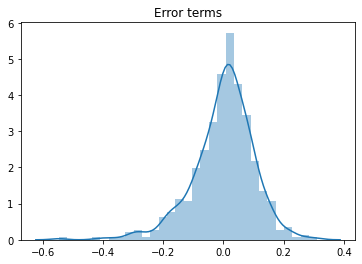

In [156]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

### Residual analysis on train dataset after model building and the assumptions are validated.

Text(0, 0.5, 'Residual')

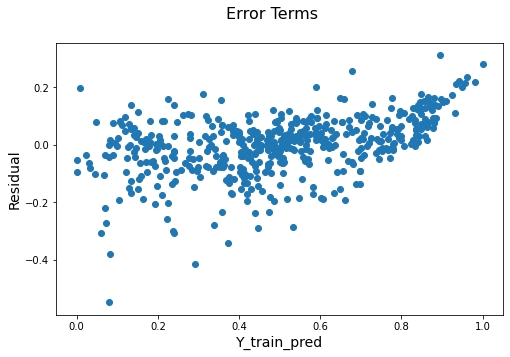

In [157]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)               # X-label
plt.ylabel('Residual', fontsize=14)

    Insights:

    It seems like the corresponding residual plot is reasonably random.
    Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

In [158]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_pred)

0.8097604366789635

## Model Evaluation on test set

In [159]:
# check dataframe for the test set
df_test.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
566   1        0           0  0.652175  0.606373  0.863516   0.393568   
374   1        0           1  0.276477  0.293773  0.584521   0.340487   
181   0        0           1  0.817910  0.744691  0.265533   0.165370   
529   1        0           1  0.720868  0.707113  0.486457   0.476922   
233   0        0           1  0.777567  0.725877  0.359532   0.524373   

     season_Spring  season_Summer  season_Winter  ...  mnth_Jan  mnth_Jul  \
566              0              0              0  ...         0         1   
374              1              0              0  ...         1         0   
181              0              0              0  ...         0         1   
529              0              1              0  ...         0         0   
233              0              0              0  ...         0         0   

     mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  mnth_Oct  mnth_Sep  \
566         0         0         0         0         0         0   
374         0         0         0         0         0         0   
181         0         0         0         0         0         0   
529         1         0         0         0         0         0   
233         0         0         0         0         0         0   

     weathersit_Clear  weathersit_Light Snow  
566                 0                      1  
374                 1                      0  
181                 1                      0  
529                 1                      0  
233                 1                      0  

[5 rows x 29 columns]

In [160]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

yr  holiday     atemp  windspeed  season_Spring  season_Winter  mnth_Dec  \
566   1        0  0.606373   0.393568              0              0         0   
374   1        0  0.293773   0.340487              1              0         0   
181   0        0  0.744691   0.165370              0              0         0   
529   1        0  0.707113   0.476922              0              0         0   
233   0        0  0.725877   0.524373              0              0         0   

     mnth_Jan  mnth_Jul  mnth_Nov  weathersit_Light Snow  
566         0         1         0                      1  
374         1         0         0                      0  
181         0         1         0                      0  
529         0         0         0                      0  
233         0         0         0                      0

In [161]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



const  yr  holiday     atemp  windspeed  season_Spring  season_Winter  \
566    1.0   1        0  0.606373   0.393568              0              0   
374    1.0   1        0  0.293773   0.340487              1              0   
181    1.0   0        0  0.744691   0.165370              0              0   
529    1.0   1        0  0.707113   0.476922              0              0   
233    1.0   0        0  0.725877   0.524373              0              0   

     mnth_Dec  mnth_Jan  mnth_Jul  mnth_Nov  weathersit_Light Snow  
566         0         0         1         0                      1  
374         0         1         0         0                      0  
181         0         0         1         0                      0  
529         0         0         0         0                      0  
233         0         0         0         0                      0

In [162]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)


In [163]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.788


In [164]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.777


In [165]:
# Mean Sqare Error
# mse = mean_squared_error(y_test, y_test_pred)
# print('Mean_Squared_Error :' ,round(mse,4))

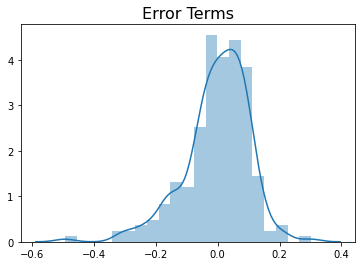

In [166]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()


The distribution plot of error term shows the normal distribution with mean at Zero.

### Residual analysis on test dataset after model building and the assumptions are validated.

Text(0, 0.5, 'Residual')

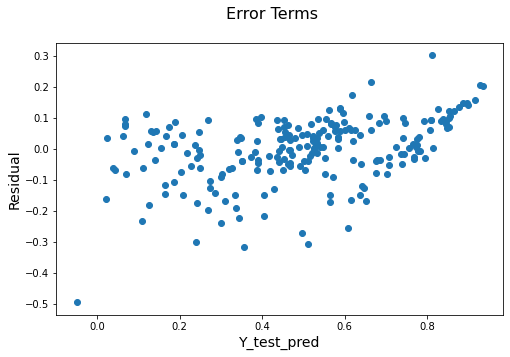

In [167]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

It seems like the corresponding residual plot is reasonably random.

Text(0, 0.5, 'y_test_pred')

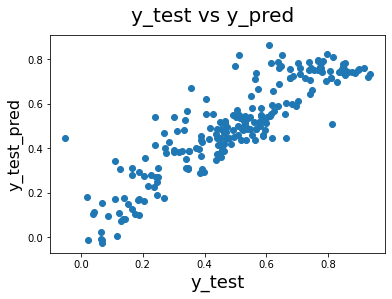

In [168]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

We can colude that the model lm_2 has descent predictive power.

In [169]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.81   Adj. R-Squared train: 0.806
R- Sqaured test :  0.79   Adj. R-Squared test : 0.777

Coefficent for the variables are:
const                    0.218
yr                       0.256
holiday                 -0.074
atemp                    0.458
windspeed               -0.120
season_Spring           -0.120
season_Winter            0.072
mnth_Dec                -0.073
mnth_Jan                -0.054
mnth_Jul                -0.058
mnth_Nov                -0.070
weathersit_Light Snow   -0.227
dtype: float64


In [170]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.788043718883416

# Conclusion

# Top variables which are affecting the bike bookings
## atemp 
    A coefficient value of ‘0.458’ indicated that a feel like temperature has significant impact on bike rentals
## yr 
    A coefficient value of ‘0.256’ indicated that a year wise the rental numbers are increasing

## weathersit_Light Snow
        A coefficient value of ‘-0.233’ indicated that the light snow and rain deters people from renting out bikes


#### It is recommended to give utmost importance to these three variables while planning to achieve maximum bike rental booking.As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.

# ---------------------------------#
### season(Winter) 
    A coefficient value of ‘0.074’ indicated that in winter  the rental numbers are increasing slightly 

### season(Spring) 
    A coefficient value of ‘-0.120’ indicated that in spring  the rental numbers have decresed for this dataset

### mnth(Dec,Jan,Jul,Nov)
    A negative coefficient value for these months shows that ,we can reduce some rental bike in these months.

### windspeed
    A coefficient value of ‘-0.120’ indicated that if windspeed is higher then the rental numbers are decreasing slightly

### holiday
    A coefficient value of ‘-0.074’ indicated that in holiday , people tends to rent bike lesser in holiday , they want to spend time with family also in holiday they donot go to there workplace so less bike rentals